# Initialize Folders

In [1]:
from __future__ import print_function
from imutils import paths
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import keras

from keras.preprocessing import image as image_utils
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as keras

from datetime import datetime

from UnetModel import *
#import skimage.io as io
#import skimage.transform as trans

#K.set_image_data_format("channels_last")

%matplotlib inline
%load_ext autoreload
%autoreload 2


Using TensorFlow backend.


In [2]:
img_rows = 256
img_cols = 256

#Training data generation
data_gen_args = dict(
#    samplewise_center = True,
#    samplewise_std_normalization = True,
    rotation_range=180,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip = True,
    fill_mode='nearest')

#Validation data generation
data_val_gen_args = dict(
    #samplewise_center = True,
    #samplewise_std_normalization = True
    )

#Create UNet Model
#model = FullUnetModel()
#model = UnetModel()
model = BiggerLeakyUnetModelWithBatchnorm()

#model = BiggerLeakyUnetModelWithLayernorm()

#Setup generator
batch_size = 2
      
myGene = trainGenerator(batch_size,'data/train','images','masks',data_gen_args, target_size= (img_rows,img_rows))
myValGene = validationGenerator(batch_size,'data/val','images','masks',data_val_gen_args, target_size= (img_rows,img_rows))

#Create folder for models
date_object = datetime.now()
# convert object to the format we want
formatted_date = date_object.strftime('%Y%m%d')
output_dir = 'unet/{}'.format(formatted_date)
os.makedirs(output_dir, exist_ok =True)

#Setup Checkpoint to only capture best estimate
model_checkpoint = ModelCheckpoint('{}/unet_lesion_{{epoch:03d}}-{{val_jaccard_coef:.5f}}.hdf5'.format(output_dir)
                                   , monitor='val_jaccard_coef'
                                   ,verbose=1, mode='max', save_best_only=True)


Instructions for updating:
Colocations handled automatically by placer.


c:\notebooks\MelanomaSegmentation\UnetModel.py:539: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  model = Model(input=inputs, output=output)


In [3]:
iterations = 100
#Train
history = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=iterations,
    callbacks=[model_checkpoint],
    validation_data=myValGene,
    validation_steps=260)

model.save(os.path.join(output_dir, 'iter_{}'.format(iterations)))

Epoch 1/100
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
Found 519 images belonging to 1 classes.
Found 1555 images belonging to 1 classes.
1000/1000 [==============================] - 643s 643ms/step - loss: -0.2942 - jaccard_coef: 0.2942 - val_loss: -0.3324 - val_jaccard_coef: 0.3324

Epoch 00001: val_jaccard_coef improved from -inf to 0.33238, saving model to unet/20190523/unet_lesion_001-0.33238.hdf5
Epoch 2/100
1000/1000 [==============================] - 615s 615ms/step - loss: -0.3185 - jaccard_coef: 0.3185 - val_loss: -0.3175 - val_jaccard_coef: 0.3175

Epoch 00002: val_jaccard_coef did not improve from 0.33238
Epoch 3/100
1000/1000 [==============================] - 628s 628ms/step - loss: -0.3301 - jaccard_coef: 0.3301 - val_loss: -0.3184 - val_jaccard_coef: 0.3184

Epoch 00003: val_jaccard_coef did not improve from 0.33238
Epoch 4/100
1000/1000 [==============================] - 609s 609ms/step - loss: -0.3372 - jaccard_coef: 0.3372 - va

1000/1000 [==============================] - 615s 615ms/step - loss: -0.6472 - jaccard_coef: 0.6472 - val_loss: -0.6664 - val_jaccard_coef: 0.6664

Epoch 00030: val_jaccard_coef did not improve from 0.67845
Epoch 31/100
1000/1000 [==============================] - 620s 620ms/step - loss: -0.6610 - jaccard_coef: 0.6610 - val_loss: -0.6657 - val_jaccard_coef: 0.6657

Epoch 00031: val_jaccard_coef did not improve from 0.67845
Epoch 32/100
1000/1000 [==============================] - 607s 607ms/step - loss: -0.6666 - jaccard_coef: 0.6666 - val_loss: -0.6817 - val_jaccard_coef: 0.6817

Epoch 00032: val_jaccard_coef improved from 0.67845 to 0.68169, saving model to unet/20190523/unet_lesion_032-0.68169.hdf5
Epoch 33/100
1000/1000 [==============================] - 623s 623ms/step - loss: -0.6676 - jaccard_coef: 0.6676 - val_loss: -0.7002 - val_jaccard_coef: 0.7002

Epoch 00033: val_jaccard_coef improved from 0.68169 to 0.70023, saving model to unet/20190523/unet_lesion_033-0.70023.hdf5
Epoch

Epoch 64/100
1000/1000 [==============================] - 630s 630ms/step - loss: -0.7752 - jaccard_coef: 0.7752 - val_loss: -0.7805 - val_jaccard_coef: 0.7805

Epoch 00064: val_jaccard_coef did not improve from 0.78342
Epoch 65/100
1000/1000 [==============================] - 610s 610ms/step - loss: -0.7792 - jaccard_coef: 0.7792 - val_loss: -0.7660 - val_jaccard_coef: 0.7660

Epoch 00065: val_jaccard_coef did not improve from 0.78342
Epoch 66/100
1000/1000 [==============================] - 627s 627ms/step - loss: -0.7891 - jaccard_coef: 0.7891 - val_loss: -0.7562 - val_jaccard_coef: 0.7562

Epoch 00066: val_jaccard_coef did not improve from 0.78342
Epoch 67/100
1000/1000 [==============================] - 616s 616ms/step - loss: -0.7870 - jaccard_coef: 0.7870 - val_loss: -0.7760 - val_jaccard_coef: 0.7760

Epoch 00067: val_jaccard_coef did not improve from 0.78342
Epoch 68/100
1000/1000 [==============================] - 624s 624ms/step - loss: -0.7816 - jaccard_coef: 0.7816 - val_l

1000/1000 [==============================] - 617s 617ms/step - loss: -0.8125 - jaccard_coef: 0.8125 - val_loss: -0.7714 - val_jaccard_coef: 0.7714

Epoch 00100: val_jaccard_coef did not improve from 0.79154


In [ ]:
#Continue traing
#Use initial_epoch 

history2 = model.fit_generator(
    myGene,
    steps_per_epoch = 1000, 
    epochs=200,
    callbacks=[model_checkpoint,tensorBoard], 
    initial_epoch = 100,
    validation_data=myValGene,
    validation_steps=100)

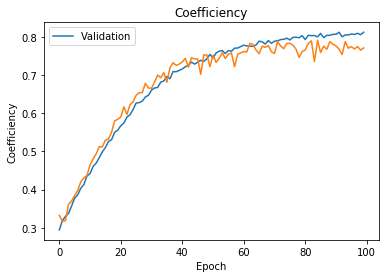

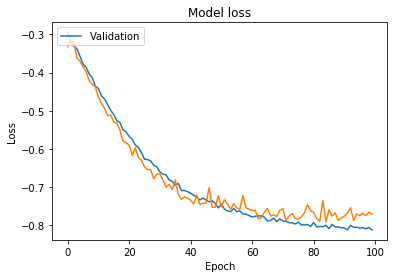

In [4]:
# Plot training & validation accuracy values
plt.plot(history.history['jaccard_coef'])
plt.plot(history.history['val_jaccard_coef'])
plt.title('Coefficiency')
plt.ylabel('Coefficiency')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

In [7]:
model.save('unet_lesion_20190520_batchnorm_200_epochs.hdf5')

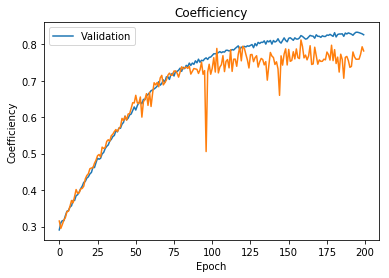

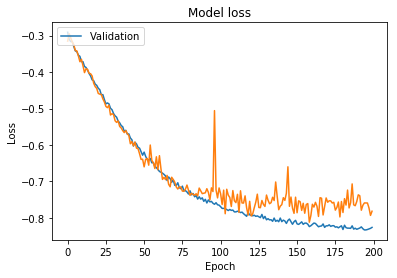

Training co-effiency    : 0.8329890729293876;
Validation co-effiency : 0.7589136445522309


In [8]:
#This code combined 2 seperate training history together and plot the result
hist = {}
for i in history.history.keys():
    hist_concate = np.array([np.array(history.history[i]), np.array(history2.history[i])]).flatten() 
    hist[i] = hist_concate
# Plot training & validation accuracy values
plt.plot(hist['jaccard_coef'])
plt.plot(hist['val_jaccard_coef'])
plt.title('Coefficiency')
plt.ylabel('Coefficiency')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.legend(['Validation'], loc='upper left')
plt.show()

coef = np.array(hist['jaccard_coef'])
val_coef = np.array(hist['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


In [5]:
coef = np.array(history.history['jaccard_coef'])
val_coef = np.array(history.history['val_jaccard_coef'])
print("Training co-effiency    : {};\nValidation co-effiency : {}".format(coef[coef==max(coef)][0], val_coef[np.argmax(coef)]))


Training co-effiency    : 0.783300117247101;
Validation co-effiency : 0.7747246850145575


In [19]:
model.load_weights("unet_lesion_20190510_0.844.hdf5")

In [10]:
model.load_weights("unet/20190519/unet_lesion_159-0.81186.hdf5")

file_names = next(os.walk(test_data_dir))[2]
scores = []
for file in file_names:
    grey_img = load_img(os.path.join(test_data_dir,file), target_size=(img_rows, img_cols), grayscale=False)
    mask_img = load_img(os.path.join(test_data_mask_dir,file.split('.')[0]+"_segmentation.png"), 
                        target_size=(img_rows, img_cols), grayscale=True)
    img = img_to_array(grey_img)
    img_mask = img_to_array(mask_img)
    
    #Preprocess image mask
    #img_mask = img_mask /255
    #img_mask[img_mask > 0.5] = 1
    #img_mask[img_mask <= 0.5] = 0
    #Preprocess images
    #mean = np.mean(img)  # mean for data centering
    #std = np.std(img)  # std for data normalization
    #img -= mean
    #img /= std
    img, img_mask = normalizeData(img, img_mask)
    img = np.reshape(img,(1,)+img.shape)
    
    
    
    pred = model.predict([img])
    sess = tf.Session()
    score = sess.run(jaccard_coef(img_mask, pred))
    print("{} -- jaccard index: {}".format(file,score))
    scores.append([file,score])

    result_img = array_to_img(pred[0] * 255 )
    result_img.save(os.path.join(test_data_pred_dir, file.split('.')[0] + '_predict.jpg'))

with open("unet_test_result.csv", 'w') as f:
    f.write("filename, jaccard_index\n")
    for i in range(len(scores)):
        #print(scores[i])
        f.write("{},{}\n".format(scores[i][0], scores[i][1]))

C:\Users\li_ni\Anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


ISIC_0000006.jpg -- jaccard index: 0.797237753868103
ISIC_0000012.jpg -- jaccard index: 0.9238954186439514
ISIC_0000020.jpg -- jaccard index: 0.951379120349884
ISIC_0000028.jpg -- jaccard index: 0.9517349600791931
ISIC_0000029.jpg -- jaccard index: 0.961754322052002
ISIC_0000032.jpg -- jaccard index: 0.9209771156311035
ISIC_0000034.jpg -- jaccard index: 0.9281620979309082
ISIC_0000036.jpg -- jaccard index: 0.4885907769203186
ISIC_0000046.jpg -- jaccard index: 0.8083372116088867
ISIC_0000047.jpg -- jaccard index: 0.8134615421295166
ISIC_0000048.jpg -- jaccard index: 0.8914300203323364
ISIC_0000049.jpg -- jaccard index: 0.7735103368759155
ISIC_0000060.jpg -- jaccard index: 0.8352223038673401
ISIC_0000066.jpg -- jaccard index: 0.8354355096817017
ISIC_0000075.jpg -- jaccard index: 0.9760467410087585
ISIC_0000081.jpg -- jaccard index: 0.72238689661026
ISIC_0000085.jpg -- jaccard index: 0.9107586741447449
ISIC_0000087.jpg -- jaccard index: 0.9489305019378662
ISIC_0000089.jpg -- jaccard index

ISIC_0009940.jpg -- jaccard index: 0.9421656727790833
ISIC_0009941.jpg -- jaccard index: 0.9322251081466675
ISIC_0009951.jpg -- jaccard index: 0.5628977417945862
ISIC_0009953.jpg -- jaccard index: 0.8674138188362122
ISIC_0009965.jpg -- jaccard index: 0.8152220845222473
ISIC_0009967.jpg -- jaccard index: 0.9445328116416931
ISIC_0009987.jpg -- jaccard index: 0.8301340937614441
ISIC_0010010.jpg -- jaccard index: 0.8610113859176636
ISIC_0010015.jpg -- jaccard index: 0.9422123432159424
ISIC_0010017.jpg -- jaccard index: 0.8516367077827454
ISIC_0010023.jpg -- jaccard index: 0.9402104020118713
ISIC_0010024.jpg -- jaccard index: 0.319009393453598
ISIC_0010025.jpg -- jaccard index: 0.8940865993499756
ISIC_0010028.jpg -- jaccard index: 0.9621630311012268
ISIC_0010056.jpg -- jaccard index: 0.8302072882652283
ISIC_0010067.jpg -- jaccard index: 0.8320149779319763
ISIC_0010069.jpg -- jaccard index: 0.9321609735488892
ISIC_0010070.jpg -- jaccard index: 0.7018309831619263
ISIC_0010171.jpg -- jaccard i

ISIC_0013001.jpg -- jaccard index: 0.31137576699256897
ISIC_0013027.jpg -- jaccard index: 0.750302791595459
ISIC_0013034.jpg -- jaccard index: 0.7147297859191895
ISIC_0013044.jpg -- jaccard index: 0.8715227246284485
ISIC_0013052.jpg -- jaccard index: 0.8781257271766663
ISIC_0013065.jpg -- jaccard index: 0.5957592129707336
ISIC_0013109.jpg -- jaccard index: 0.8824935555458069
ISIC_0013112.jpg -- jaccard index: 0.6984898447990417
ISIC_0013114.jpg -- jaccard index: 0.8573660850524902
ISIC_0013160.jpg -- jaccard index: 0.8056674003601074
ISIC_0013167.jpg -- jaccard index: 0.9359268546104431
ISIC_0013178.jpg -- jaccard index: 0.5659075975418091
ISIC_0013189.jpg -- jaccard index: 0.5841435194015503
ISIC_0013203.jpg -- jaccard index: 0.7727410197257996
ISIC_0013216.jpg -- jaccard index: 0.9225088953971863
ISIC_0013224.jpg -- jaccard index: 0.894403874874115
ISIC_0013227.jpg -- jaccard index: 0.6187976598739624
ISIC_0013230.jpg -- jaccard index: 0.9019368886947632
ISIC_0013235.jpg -- jaccard i

ISIC_0015057.jpg -- jaccard index: 0.8565106987953186
ISIC_0015108.jpg -- jaccard index: 0.9096481204032898
ISIC_0015125.jpg -- jaccard index: 0.953665554523468
ISIC_0015152.jpg -- jaccard index: 0.6990766525268555
ISIC_0015153.jpg -- jaccard index: 0.882297158241272
ISIC_0015160.jpg -- jaccard index: 0.8983690738677979
ISIC_0015174.jpg -- jaccard index: 0.8442630171775818
ISIC_0015190.jpg -- jaccard index: 0.8476554155349731
ISIC_0015193.jpg -- jaccard index: 0.9294255375862122
ISIC_0015207.jpg -- jaccard index: 0.7954229712486267
ISIC_0015208.jpg -- jaccard index: 0.9379131197929382
ISIC_0015211.jpg -- jaccard index: 0.4698922336101532
ISIC_0015212.jpg -- jaccard index: 0.9437784552574158
ISIC_0015215.jpg -- jaccard index: 0.8968494534492493
ISIC_0015223.jpg -- jaccard index: 0.951770007610321
ISIC_0015229.jpg -- jaccard index: 0.6830998063087463
ISIC_0015241.jpg -- jaccard index: 0.8734714388847351
ISIC_0015279.jpg -- jaccard index: 0.8190781474113464
ISIC_0015293.jpg -- jaccard ind